### In thi notebook we shall look at some of the trrained models on different types of data to see whether there is some kind of structure int he latent space. UMAP will be needed in those cases where the dimensionality of the latent space is > 2.

In [1]:
using AlfvenDetectors
using Flux
using ValueHistories
using BSON
using PyPlot
using Dates
using PyCall
umap = pyimport("umap")

┌ Info: Recompiling stale cache file /home/vit/.julia/compiled/v1.1/AlfvenDetectors/VqnlF.ji for AlfvenDetectors [5e555b46-3391-11e9-1beb-e9498a8cd634]
└ @ Base loading.jl:1184


PyObject <module 'umap' from '/home/vit/anaconda3/lib/python3.7/site-packages/umap/__init__.py'>

In [2]:
datapath = "/home/vit/vyzkum/alfven/cdb_data/data_sample/"
shots = readdir(datapath)
shotlist = joinpath.(datapath, shots)

16-element Array{String,1}:
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10000.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10001.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10002.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10003.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10004.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10005.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10006.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10007.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10008.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10370.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10514.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10800.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10866.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10870.h5"
 "/home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10893.h5"
 "/home/vit/vyzkum/alfven/c

In [3]:
measurement_type = "mscamp"
basemodelpath = "/home/vit/vyzkum/alfven/experiments/single_col/"
modelpath = joinpath(basemodelpath, measurement_type)
if measurement_type == "mscamp"
    readfun = AlfvenDetectors.readmscamp
elseif measurement_type == "mscphase"
    readfun = AlfvenDetectors.readnormmscphase
elseif measurement_type == "mscampphase"
    readfun = AlfvenDetectors.readmscampphase
elseif measurement_type == "uprobe"
    readfun = AlfvenDetectors.readnormlogupsd
end
coils = [12,13,14];

In [50]:
if measurement_type == "uprobe"
    rawdata = AlfvenDetectors.collect_signals(shotlist, readfun)
else
    rawdata = AlfvenDetectors.collect_signals(shotlist, readfun, coils)
end
data = rawdata;
M,N = size(data)

┌ Warning: /home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10975.h5: I_plasma data not found
└ @ AlfvenDetectors /home/vit/.julia/environments/v1.1/dev/AlfvenDetectors/src/data.jl:146
┌ Warning: /home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10975.h5: I_plasma data not found
└ @ AlfvenDetectors /home/vit/.julia/environments/v1.1/dev/AlfvenDetectors/src/data.jl:146
┌ Warning: /home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10975.h5: I_plasma data not found
└ @ AlfvenDetectors /home/vit/.julia/environments/v1.1/dev/AlfvenDetectors/src/data.jl:146


(129, 97359)

In [5]:
models = readdir(modelpath)

45-element Array{String,1}:
 "AE_xdim-129_ldim-2_nlayers-4_batchsize-128_nepochs-10_2019-03-11T17:03:14.378.bson"                 
 "AE_xdim-129_ldim-2_nlayers-4_batchsize-128_nepochs-10_2019-03-11T18:15:44.79.bson"                  
 "AE_xdim-129_ldim-2_nlayers-4_batchsize-128_nepochs-10_2019-03-11T19:29:52.636.bson"                 
 "AE_xdim-129_ldim-2_nlayers-4_batchsize-128_nepochs-10_2019-03-11T20:44:22.13.bson"                  
 "AE_xdim-129_ldim-2_nlayers-4_batchsize-128_nepochs-10_2019-03-11T21:56:13.712.bson"                 
 "AE_xdim-129_ldim-2_nlayers-4_batchsize-128_nepochs-10_2019-03-11T23:08:51.7.bson"                   
 "AE_xdim-129_ldim-2_nlayers-4_batchsize-128_nepochs-10_2019-03-12T00:22:37.33.bson"                  
 "AE_xdim-129_ldim-2_nlayers-4_batchsize-128_nepochs-10_2019-03-12T01:34:12.805.bson"                 
 "AE_xdim-129_ldim-2_nlayers-4_batchsize-128_nepochs-10_2019-03-12T02:43:41.17.bson"                  
 "AE_xdim-129_ldim-2_nlayers-4_batchsize-128_

### Now lets look at a particular model

In [44]:
modelname = "VAE"
ldim = 32
imodel = 1
submodels = filter(x->x[1:length(modelname)] == modelname, models)
submodels = filter(x->occursin("ldim-$ldim",x), submodels)
bsonpath = joinpath(modelpath,submodels[imodel])
submodels

8-element Array{String,1}:
 "VAE_xdim-129_ldim-32_nlayers-4_variant-scalar_batchsize-128_nepochs-10_2019-03-11T18:37:56.693.bson"
 "VAE_xdim-129_ldim-32_nlayers-4_variant-scalar_batchsize-128_nepochs-10_2019-03-11T21:26:33.653.bson"
 "VAE_xdim-129_ldim-32_nlayers-4_variant-scalar_batchsize-128_nepochs-10_2019-03-12T02:52:52.088.bson"
 "VAE_xdim-129_ldim-32_nlayers-4_variant-scalar_batchsize-128_nepochs-10_2019-03-12T04:57:46.97.bson" 
 "VAE_xdim-129_ldim-32_nlayers-4_variant-scalar_batchsize-128_nepochs-10_2019-03-12T06:42:42.725.bson"
 "VAE_xdim-129_ldim-32_nlayers-4_variant-scalar_batchsize-128_nepochs-10_2019-03-12T08:27:47.725.bson"
 "VAE_xdim-129_ldim-32_nlayers-4_variant-scalar_batchsize-128_nepochs-10_2019-03-12T11:59:42.072.bson"
 "VAE_xdim-129_ldim-32_nlayers-4_variant-scalar_batchsize-128_nepochs-10_2019-03-12T12:23:43.64.bson" 

In [45]:
showtime(time) = Dates.canonicalize(Dates.CompoundPeriod(Dates.Second(floor(Int,time))))

showtime (generic function with 1 method)

In [46]:
modeldata = BSON.load(bsonpath)
model = modeldata[:model]
history = modeldata[:history]
time = modeldata[:time]
println("Training time: $(showtime(time))" )

Training time: 2 hours, 39 minutes, 52 seconds


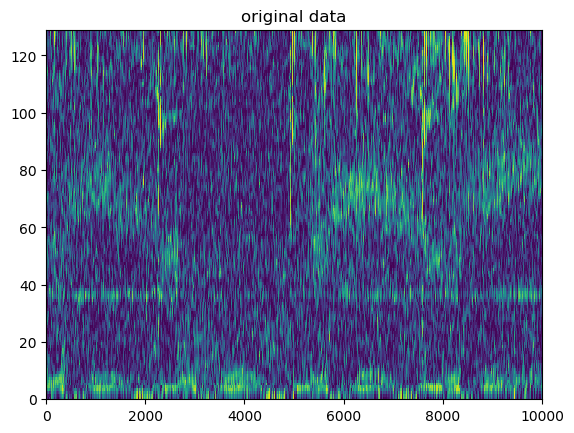

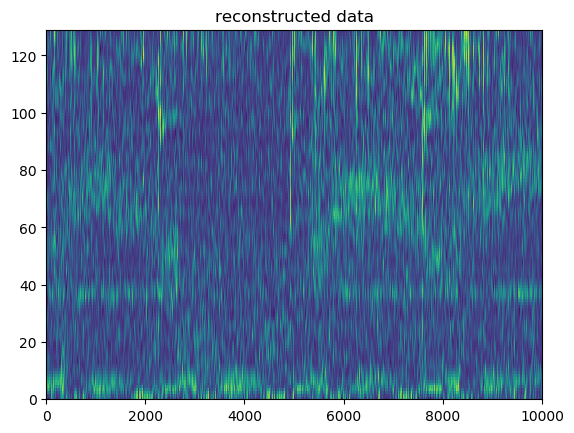

PyObject <matplotlib.collections.QuadMesh object at 0x7f00519bb6d8>

In [47]:
X = data[:,1:10000]
rX = model(X).data
if modelname != "AE"
    rX = rX[1:end-1,:]
end
pcolormesh(X)
title("original data")
figure()
title("reconstructed data")
pcolormesh(rX)

In [53]:
z = model.encoder(data).data;
if modelname != "AE"
    z = z[1:ldim,:]
end

32×97359 Array{Float32,2}:
 -0.120839      0.403163     -0.451496    …   0.843124     0.914853   
 -0.00760519    0.621926     -0.300502        0.173419     0.465524   
  0.000465512   0.0017917     0.00819906      0.00256067  -0.00237217 
  0.00850709    0.00423688    0.0190658       0.0289464    0.021128   
  0.092608     -0.966291     -0.7672         -0.481782    -0.81836    
  1.20382       1.96161      -0.0381439   …  -0.689996    -0.265268   
  0.981604      0.56376      -0.0919416      -1.15268     -0.69614    
 -0.43417       0.379944      0.558868        0.215012    -0.960158   
  0.0172134     0.0164799     0.0181712       0.0122947    0.0105869  
 -1.04253      -0.968045      0.239702        0.816354    -0.805165   
  0.472506      0.711403      0.304906    …   0.00522649  -1.06976    
 -0.445929     -0.369243      0.14127         1.41889      1.57571    
  0.00777553    0.0105479     0.0180445      -0.00642364  -0.0160435  
  ⋮                                       ⋱       

In [56]:
if ldim > 2
    umap_model = umap.UMAP(n_components = 2, n_neighbors=5, min_dist=0.3)
    #@time Matrix(umap_model.fit_transform((z[:,1:1000])')')
    @time z2D = Matrix(umap_model.fit_transform((z)')')
else
    z2D = z
end

 85.693209 seconds (56 allocations: 1.488 MiB)


2×97359 Array{Float32,2}:
  1.49314   0.897312   0.690305  3.34294  …   1.97558   2.48043   -0.0308223
 -4.29247  -4.95894   -4.41272   1.80405     -0.745864  0.519389  -0.352585 

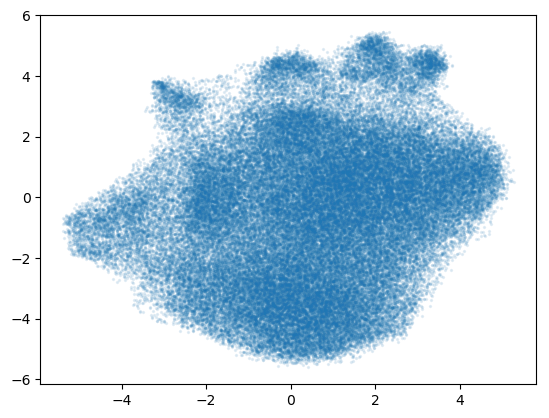

PyObject <matplotlib.collections.PathCollection object at 0x7f00511d3160>

In [55]:
scatter(z2D[1,:], z2D[2,:], s= 2, alpha= 0.1)

### Try to select shots where there should be an Alfven mode and project them into the latent space.

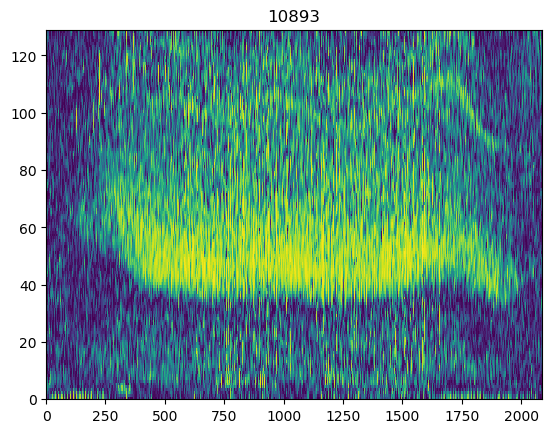

PyObject Text(0.5, 1.0, '10893')

In [81]:
shot1no = 10893
shot1 = joinpath(datapath, "Jldata$(shot1no).h5")
data1 = AlfvenDetectors.get_ft_signals(shot1, readfun, 14)
z1 = model.encoder(data1).data
if modelname != "AE"
    z1 = z1[1:ldim,:]
end;
if ldim > 2
    z1 = Matrix(umap_model.transform(z1')')
end
pcolormesh(data1)
title(shot1no)

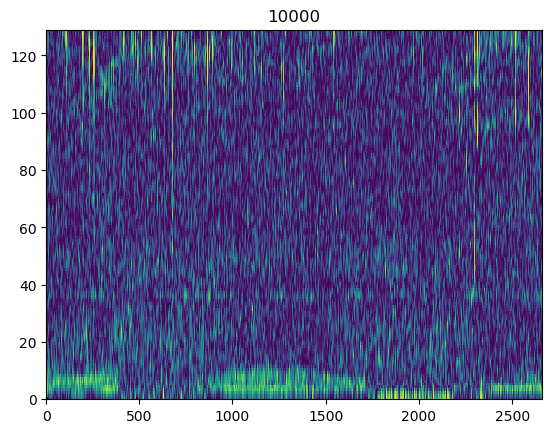

PyObject Text(0.5, 1.0, '10000')

In [82]:
shot2no = 10000
shot2 = joinpath(datapath, "Jldata$(shot2no).h5")
data2 = AlfvenDetectors.get_ft_signals(shot2, readfun, 13)
z2 = model.encoder(data2).data
if modelname != "AE"
    z2 = z2[1:ldim,:]
end;
if ldim > 2
    z2 = Matrix(umap_model.transform(z2')')
end
pcolormesh(data2)
title(shot2no)

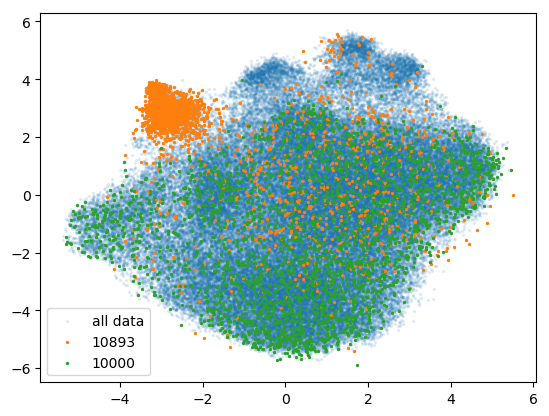

PyObject <matplotlib.legend.Legend object at 0x7f00571b5208>

In [83]:
scatter(z2D[1,:], z2D[2,:], s= 2, alpha= 0.1, label="all data")
scatter(z1[1,:], z1[2,:], s=2, label="$shot1no")
scatter(z2[1,:], z2[2,:], s=2, label="$shot2no")
legend()